Missing Values:
 flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
dtype: int64


/var/folders/tx/k8p2xbtn0cjgvn8dh714226r0000gn/T/ipykernel_4265/2485800029.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.log1p(X[col].clip(lower=0))  # Avoid negative values
/var/folders/tx/k8p2xbtn0cjgvn8dh714226r0000gn/T/ipykernel_4265/2485800029.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = np.log1p(X[col].clip(lower=0))  # Avoid negative values
/var/folders/tx/k8p2xbtn0cjgvn8dh714226r0000gn/T/ipykernel_4265/2485800029.py:41: SettingWithCopyWarning: 
A value is trying t

Train Shape: (192000, 46) Test Shape: (48000, 46)

Train Class Distribution:
 7    24000
4    24000
2    24000
0    24000
5    24000
3    24000
6    24000
1    24000
Name: count, dtype: int64

Test Class Distribution:
 1    6000
2    6000
5    6000
3    6000
4    6000
7    6000
6    6000
0    6000
Name: count, dtype: int64


/opt/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 1.44071 | test_accuracy: 0.57356 |  0:00:09s
epoch 10 | loss: 0.7863  | test_accuracy: 0.69144 |  0:01:36s
epoch 20 | loss: 0.71227 | test_accuracy: 0.71094 |  0:03:13s
epoch 30 | loss: 0.68157 | test_accuracy: 0.73156 |  0:04:47s
epoch 40 | loss: 0.65571 | test_accuracy: 0.73379 |  0:06:16s
epoch 50 | loss: 0.63682 | test_accuracy: 0.73812 |  0:08:07s
epoch 60 | loss: 0.60974 | test_accuracy: 0.74444 |  0:09:51s
epoch 70 | loss: 0.59883 | test_accuracy: 0.72717 |  0:11:42s
epoch 80 | loss: 0.59611 | test_accuracy: 0.74688 |  0:13:42s
epoch 90 | loss: 0.58505 | test_accuracy: 0.72592 |  0:15:45s
Stop training because you reached max_epochs = 100 with best_epoch = 97 and best_test_accuracy = 0.76975


/opt/anaconda3/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



Classification Report:
               precision    recall  f1-score   support

      Benign       0.78      0.75      0.77      6000
  BruteForce       0.64      0.77      0.70      6000
        DDoS       0.83      0.78      0.81      6000
         DoS       0.79      0.84      0.82      6000
       Mirai       1.00      1.00      1.00      6000
       Recon       0.69      0.64      0.67      6000
    Spoofing       0.87      0.62      0.73      6000
         Web       0.63      0.75      0.69      6000

    accuracy                           0.77     48000
   macro avg       0.78      0.77      0.77     48000
weighted avg       0.78      0.77      0.77     48000



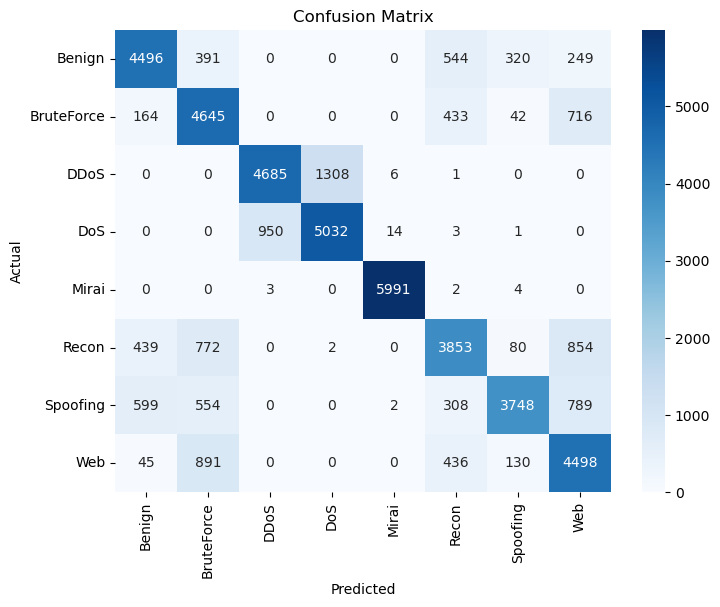


Feature Importances:
             Feature    Importance
1     Header_Length  1.121915e-01
0     flow_duration  1.106720e-01
42           Radius  7.685594e-02
14        ack_count  7.056157e-02
5             Srate  6.260328e-02
18        rst_count  6.236314e-02
44         Variance  5.853799e-02
15        syn_count  5.290051e-02
24              SSH  4.144594e-02
3          Duration  4.084452e-02
11  ack_flag_number  3.579896e-02
4              Rate  2.837303e-02
36              AVG  2.827794e-02
17        urg_count  2.742769e-02
34              Min  2.554970e-02
39              IAT  2.512291e-02
22           Telnet  1.545948e-02
45           Weight  1.441825e-02
33          Tot sum  1.426727e-02
40           Number  1.375207e-02
2     Protocol Type  1.307418e-02
16        fin_count  1.290877e-02
25              IRC  1.106581e-02
26              TCP  1.039002e-02
29              ARP  6.504314e-03
41         Magnitue  4.651120e-03
13  cwr_flag_number  4.453206e-03
28             DHCP  4.38

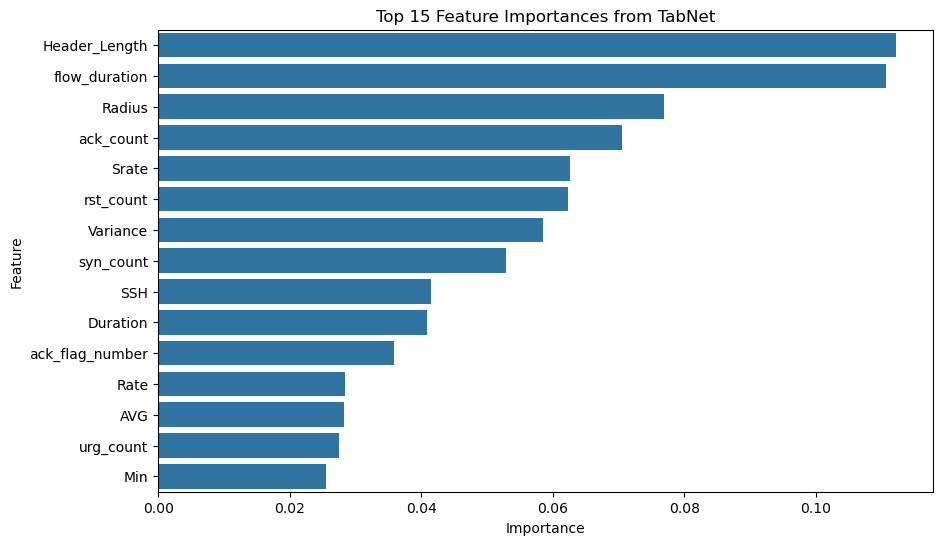

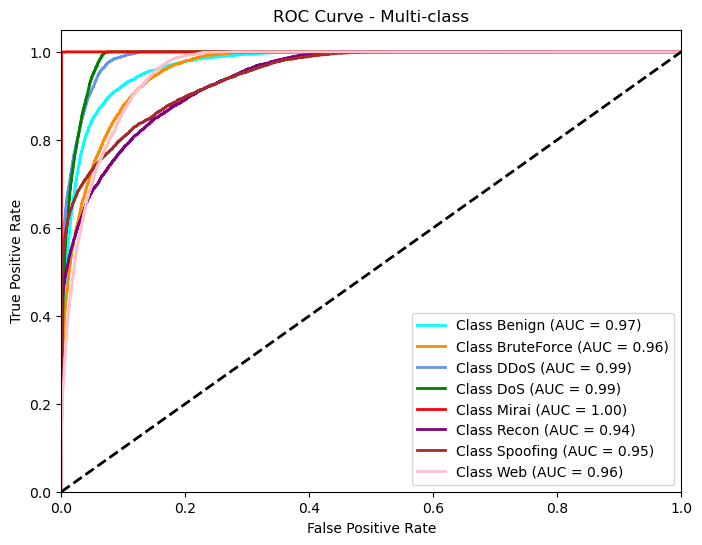

In [6]:
# ==============================
# 1. Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from itertools import cycle
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# ==============================
# 2. Load Dataset
# ==============================
file_path = "/Users/bodapati/Downloads/balanced_dataset3.csv"
df = pd.read_csv(file_path)

# Features and Target
features = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
            'fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
            'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'urg_count',
            'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP',
            'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT',
            'Number', 'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight']
target = "label"

X = df[features]
y = df[target]

# ==============================
# 3. Preprocessing
# ==============================
# Check for missing values
print("Missing Values:\n", X.isnull().sum())

# Log-transform skewed features
for col in ['Rate', 'Srate', 'IAT']:
    X[col] = np.log1p(X[col].clip(lower=0))  # Avoid negative values

# Encode categorical features
le = LabelEncoder()
y = le.fit_transform(y)

if X["Protocol Type"].dtype == "object":
    X["Protocol Type"] = LabelEncoder().fit_transform(X["Protocol Type"])

# Scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ==============================
# 4. Train-Test Split
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)
print("\nTrain Class Distribution:\n", pd.Series(y_train).value_counts())
print("\nTest Class Distribution:\n", pd.Series(y_test).value_counts())

# ==============================
# 5. TabNet Classifier with Updated Hyperparameters
# ==============================
# Define class weights for underperforming classes
class_weights = {i: 1.0 for i in range(len(le.classes_))}
class_weights[le.transform(['BruteForce'])[0]] = 2.0
class_weights[le.transform(['Recon'])[0]] = 2.0
class_weights[le.transform(['Web'])[0]] = 1.5

tabnet = TabNetClassifier(
    device_name="auto",  # Automatically select GPU if available
    n_d=32, n_a=32, n_steps=5,  # Increased capacity
    gamma=1.3, n_independent=2, n_shared=2,
    momentum=0.3, clip_value=2.0,
    lambda_sparse=1e-4, optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-2),  # Lower learning rate
    scheduler_params={"mode": "max", "factor": 0.5, "patience": 5},
    scheduler_fn=torch.optim.lr_scheduler.ReduceLROnPlateau,
    verbose=10
)

# ==============================
# 6. Training
# ==============================
tabnet.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=20,
    batch_size=2048, virtual_batch_size=256,  # Increased batch sizes
    weights=class_weights
)

# ==============================
# 7. Evaluation
# ==============================
y_pred = tabnet.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = tabnet.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances from TabNet')
plt.show()

# ROC Curve (Multiclass)
y_pred_proba = tabnet.predict_proba(X_test)
n_classes = len(le.classes_)
fpr, tpr, roc_auc = {}, {}, {}
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green", "red", "purple", "brown", "pink"])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Multi-class")
plt.legend(loc="lower right")
plt.show()